In [2]:
#############################################################################
'''Importing Libraries'''
from math import pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyvista as pv
#############################################################################

plt.figure(figsize=(30, 30), dpi=120)

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

In [14]:
#Ergun equation to predict pressure drop at fixed beds
def Ergun(inlet_velocity, mu, rhol, dp):
    eps_mf = 0.30
    delta_p = 0.23875*(150*inlet_velocity*mu*(1 - eps_mf)**2/(dp**2*eps_mf**3) + 1.75*inlet_velocity**2*rhol*(1 - eps_mf)/(dp*eps_mf**3))
    return delta_p

deltap_Ergun = Ergun(0.02, 0.0000008379*996.7775, 996.7775, 0.00308724)

In [15]:
#Take case path as argument and store at currentPath
currentPath = ['D:/results/lethe/Test_smooth/smooth_0dp/output', 'D:/results/lethe/Test_smooth/smooth_5dp/output', 'D:/results/lethe/Test_smooth/smooth_10dp/output']
#saveFigDir = currentPath.replace('/output', '')

In [16]:
#Read name of files in .pvd file
for folder in currentPath:
    case = folder.replace('/output', '').replace('D:/results/lethe/Test_smooth/smooth_', '')
    print(case)
    files = pd.read_csv(f'{folder}/result_.pvd',sep='"',skiprows=6, usecols=[1, 5], names = ['time', 'vtu'])
    files = files.dropna()
    time_list = files['time'].tolist()
    list_vtu = files['vtu'].tolist()
    list_vtu = [i.replace('.pvtu', '.0000.vtu') for i in list_vtu]

    #Read VTU data
    for i in range(0, len(list_vtu)):
        #Read DF from VTU files
        exec(f'df_{case}_{i} = pv.read(f\'{folder}/{list_vtu[i]}\')')

        exec(f'df_{case}_position = df_{case}_0.points')
        exec(f'df_{case}_void = df_{case}_0[\'void_fraction\']')
        exec(f'df_{case}_p = df_{case}_0[\'pressure\']')

    for i in range(1, len(list_vtu)):
        exec(f'df_{case}_void = np.concatenate([df_{case}_void, df_{case}_{i}[\'void_fraction\']])')
        exec(f'df_{case}_p = np.concatenate([df_{case}_p, df_{case}_{i}[\'pressure\']])')

0dp
5dp
10dp


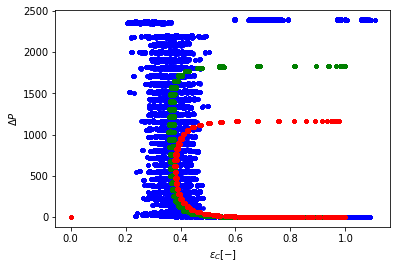

In [17]:
plt.plot(df_0dp_void, 998.2*df_0dp_p, '.b')
plt.plot(df_5dp_void, 998.2*df_5dp_p, '.g')
plt.plot(df_10dp_void, 998.2*df_10dp_p, '.r')
plt.ylabel(r'$\Delta P$')
plt.xlabel(r'$\varepsilon_C [-]$')
plt.show()

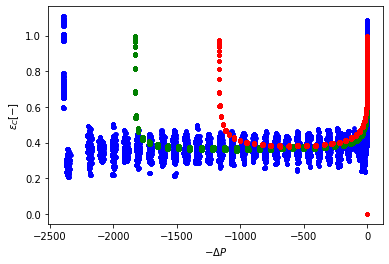

In [18]:
plt.plot(-998.2*df_0dp_p, df_0dp_void, '.b')
plt.plot(-998.2*df_5dp_p, df_5dp_void, '.g')
plt.plot(-998.2*df_10dp_p, df_10dp_void, '.r')
plt.xlabel(r'$-\Delta P$')
plt.ylabel(r'$\varepsilon_C [-]$')
plt.show()

for i in range(0, len(list_vtu)):
    exec(f'fig{i} = plt.figure()')
    exec(f'ax{i} = fig1.add_subplot(111)')
    exec(f'ax{i}.plot(df_21.points[:,0]+0.55, 998.2*df_{i}[\'pressure\'], \'.\')')
    exec(f'ax{i}.set_ylabel(r\'$\Delta P$\')')
    exec(f'ax{i}.set_xlabel(r\'$x [m]$\')')
    exec(f'fig{i}.suptitle(f\'Time = {time_list[i]} s\')')
    exec(f'fig{1}.savefig(f\'{saveFigDir}/P_x_total/P_x_total-{i}.png\')')
    exec(f'plt.close(fig{i})')

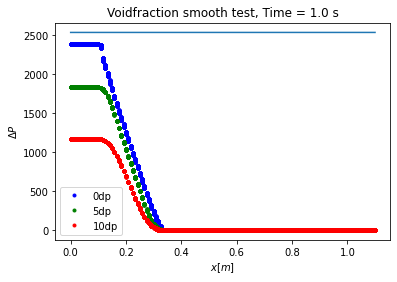

In [19]:
i = 4
exec(f'plt.plot(df_0dp_0.points[:,0]+0.55, 998.2*df_0dp_{i}[\'pressure\'], \'.b\', label = \'0dp\')')
exec(f'plt.plot(df_5dp_0.points[:,0]+0.55, 998.2*df_5dp_{i}[\'pressure\'], \'.g\', label = \'5dp\')')
exec(f'plt.plot(df_10dp_0.points[:,0]+0.55, 998.2*df_10dp_{i}[\'pressure\'], \'.r\', label = \'10dp\')')
plt.plot(df_0dp_0.points[:,0]+0.55, np.repeat(deltap_Ergun, len(df_0dp_0.points[:,0])))
plt.ylabel(r'$\Delta P$')
plt.xlabel(r'$x [m]$')
plt.title(f'Voidfraction smooth test, Time = {time_list[i]} s')
plt.legend()
#fig{1}.savefig(f\'{saveFigDir}/P_x_total/P_x_total-{i}.png\')
plt.show()